In [1]:
import requests
from bs4 import BeautifulSoup


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
#輸入地區
Location = str(input())

Website = "https://ifoodie.tw"

#獲取連結
Link = list()
#獲取店家名稱
Name = list()
#獲取圖片
Photo = list()
#獲取評分
Rate = list()
#均消
Price = list()
#評論
Comment = list()
#營業時間
Time = list()
#地址
Address = list()
#分類
Category = list()
#網站bug修復
a = 0

response = requests.get(
    "https://ifoodie.tw/explore/"+Location+"/list")
soup = BeautifulSoup(response.text, "html.parser")
Content = soup.find("div", class_="jsx-1320204615 item-list")
List = Content.find_all("div", class_="jsx-2133253768 restaurant-info")
for k in List:
  #print(k)
  Link.append(Website+k.find("a").get("href"))
  Name.append(k.find("img")["alt"])
  if(a<=1):
    Photo.append(k.find("img")["src"])
  else:
    Photo.append(k.find("img")["data-src"])
  Rate.append(k.find("div", class_="jsx-1207467136 text").string)
  if (k.find("div", class_="jsx-2133253768 avg-price")):
    Price.append(k.find("div", class_="jsx-2133253768 avg-price").text)   
  else:
    Price.append("無資訊")
  Comment.append(Website+k.find("a", class_="jsx-2133253768 review-count").get("href"))
  tmp = k.find("div", class_="jsx-2133253768 info").getText()
  Time.append(tmp)
  Address.append(k.find("div", class_="jsx-2133253768 address-row").getText())
  for i in k.find_all("a", class_="jsx-2133253768 category"):
    if(i.getText()=="附近餐廳"):
      continue
    Category.append(i.getText())
  

  a += 1
print(Name)



#Link = List.find('a')['href']
#print(List)  #輸出排版後的HTML內容

台南
['鳳樲二 DEAR SHE 鍋物語', '犬首燒', '捌伍貳冰室', '古早味鍋燒意麵', 'Sinyi Cafe 心藝咖啡', '川囍紅湯串串鍋', '松笠屋', '王氏魚皮店', '春囍打邊爐 台南店', 'Nani麵', '初幸居食屋 忠義店', '開心製造所', '小豆豆', '白妞鹹酥雞', '阿翔蚵仔煎']


Building prefix dict from /content/drive/MyDrive/Colab Notebooks/dict.txt.big.txt ...
Loading model from cache /tmp/jieba.u5a18ad7858d19538060d94b6a9416237.cache
Loading model cost 1.477 seconds.
Prefix dict has been built successfully.


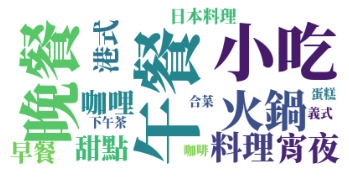

In [10]:
#食物分類文字雲
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import jieba
import numpy as np
file = open('Category.txt','w');

file.write(str(Category));

file.close()

font = "/content/drive/MyDrive/Colab Notebooks/NotoSerifCJKtc-Black.otf"
text = open('Category.txt', 'r', encoding='utf-8').read()
# 設定使用 big5 斷詞
jieba.set_dictionary("/content/drive/MyDrive/Colab Notebooks/dict.txt.big.txt")
wordlist = jieba.cut(text)
words = " ".join(wordlist)


#背景顏色預設黑色，改為白色、使用指定字體
my_wordcloud = WordCloud(background_color='white',font_path=font).generate(words)

plt.imshow(my_wordcloud)
plt.axis("off")
plt.show()
#存檔
my_wordcloud.to_file('word_cloud.png')



In [ ]:
for k in List:
 print(k)

<div class="jsx-2133253768 restaurant-info"><a class="jsx-2133253768" href="/restaurant/559db84cc03a103ee86c9f06-%E6%9E%97%E5%AE%B6%E4%B9%BE%E9%BA%B5%E5%BA%97" target="_self"><img alt="林家乾麵店" class="jsx-2133253768 cover" src="https://lh3.googleusercontent.com/Q007dARnMY4sZVwy6ruXk1XC0aJAHZIv_hTrhkcIGy1P3bSxwkwOlvXWTeyeWLG_SfA7Y5RP0eJO1N2zEhIjfntuFgVRCJU=s360"/></a><div class="jsx-2133253768 info-rows"><div class="jsx-2133253768 title-row"><div class="jsx-2133253768 title"><span class="jsx-2133253768 index">1.</span><a class="jsx-2133253768 title-text" href="/restaurant/559db84cc03a103ee86c9f06-%E6%9E%97%E5%AE%B6%E4%B9%BE%E9%BA%B5%E5%BA%97" target="_self">林家乾麵店</a></div></div><div class="jsx-2133253768 review-row"><div class="jsx-2133253768"><div class="jsx-1207467136 rating-star level-4 responsive "><div class="jsx-1207467136 text">4.3</div><svg class="star" height="25px" version="1.1" viewbox="0 0 25 25" width="25px" xmlns="http://www.w3.org/2000/svg" xmlns:xlink="http://www.w3.org/19